# Language distribution network

#### Students: Alberio Alessandro & Resuli Klebiana

This bipartite network denotes which languages are spoken in which countries.  Nodes are countries and languages; edge weights denote the proportion (between zero and one) of the population of a given country speaking a given language.

Source: https://networks.skewed.de/net/unicodelang

In this analysis, following points will be examinate:
- a) Graphical representation
- b) Network classification
- c) Topological properties
- d) Connected components and their size distribution
- e) Node degrees and distribution 
- f) Most important vertex of network 
- g) Network transitivity level
- h) Community partition
- i) Assortativity degree
- l) Network randomness

In [57]:
import igraph
import pandas as pd

df = pd.read_csv('edges.csv', header=0, names=['source','target','weight'])
LG = igraph.Graph.TupleList(df[['source','target','weight']].itertuples(index=False), edge_attrs="weight")

In [58]:
df.head(4)

,source,target,weight
0,0,256,0.059
1,0,262,0.000
2,0,260,0.007
3,0,261,0.000


### a) Graphical representation of the network

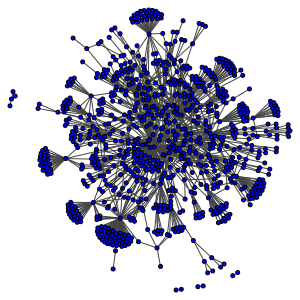

In [59]:
visual_style = {"bbox":(300,300), "margin":10}
igraph.plot(LG, vertex_color='blue', vertex_size=4, **visual_style)

### b) Network classification

In [60]:
print(LG.summary())

IGRAPH UNW- 868 1255 -- 
+ attr: name (v), weight (e)


From igrapgh classification Network can be defined as:
- U: undirected
- N: has vertex attribute called name
- W: weighted

### c) Topological properties

In [61]:
print('number of vertices in G:', LG.vcount())
print('number of edges in G:', LG.ecount())

number of vertices in G: 868
number of edges in G: 1255


The number of **vertexes** is **868**.
The number of **edges** is **1255**.

Three important positional properties used in order to describe a network are the following one:

- **Network's Diameter**: maximum distance of any two nodes in the graph;
- **Eccentricity** of node i: maximum distance of any other node from i;
- **Average distance**: mean shortest path length, is a global measure that quantifies how close are the vertices of network on average.

In [62]:
print('The diameter of LG is:', LG.diameter())
print('The eccentricity of node 1 in LG is:', LG.eccentricity(1))
print('The average distance in LG is:', LG.average_path_length())

The diameter of LG is: 8
The eccentricity of node 1 in LG is: 8.0
The average distance in LG is: 4.208425129602733


- **Node distance distribution** in LG:

The distances in LG have the following distribution:


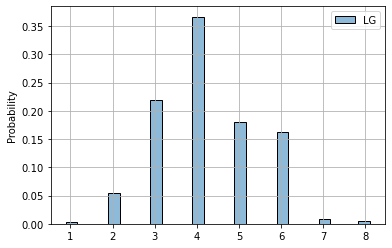

In [63]:
print('The distances in LG have the following distribution:')
LG_d = []
for i in range(LG.vcount()):
    LG_d.extend(LG.shortest_paths(i,range(i+1,LG.vcount()))[0])

import seaborn as sns
import matplotlib.pyplot as plt
# this is a normalized histogram
ax = sns.histplot({'LG':LG_d}, fill=True, shrink=5, common_norm=True, stat='probability') 
plt.grid()


### d) Connected components and their size distribution

In [64]:
# check if the graph is connected
print('is LG graph connected?', LG.is_connected())

is LG graph connected? False


In [65]:
# extract the LG's connected components
components = LG.components()
# get each component as a subgraph
H,K,Y,V,C = components.subgraphs()

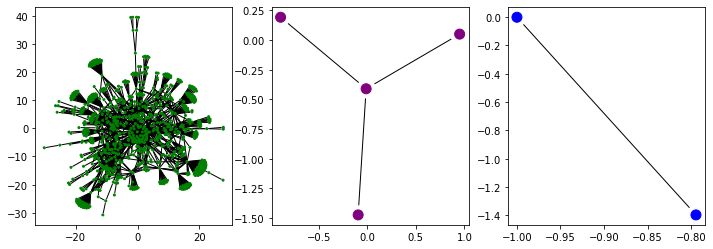

In [66]:
# plot of three components
fig = plt.figure(figsize=(12,4))
ax = fig.subplots(nrows=1, ncols=3)
vs = {"bbox":(300,300)}
igraph.plot(H, vertex_color='Green', vertex_size=2, **vs, target=ax[0])
igraph.plot(K, vertex_color='Purple', vertex_size=10, **vs, target=ax[1])
igraph.plot(Y, vertex_color='Blue', vertex_size=10, **vs, target=ax[2])

### e) Node degrees and distribution 

In [67]:
import numpy as np

print('The average degree of LG network is:', np.mean(LG.degree()))
print('The maximum degree of LG network is:',max(LG.degree()))
print('The minumum degree of LG network is:',min(LG.degree()))

The average degree of LG network is: 2.891705069124424
The maximum degree of LG network is: 141
The minumum degree of LG network is: 1


**Average degree, maximum degree and minimum degree** of nodes are summarized above.

The **degree distribution** provides the estimation of number of edges those converge in a vertex.

These are the degree distribution and the CCDF (how often the random variable is above a particular level) of LG network:


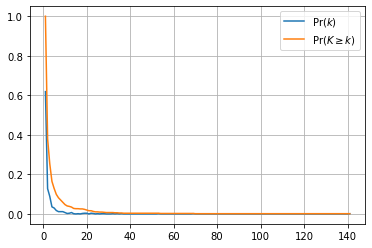

In [68]:
from collections import Counter
from matplotlib import pyplot as plt
LG_deg_count = Counter(LG.degree())
LG_deg_dist_array = np.array([LG_deg_count.get(k,0)/LG.vcount() for k in range(min(LG.degree()),max(LG.degree())+1)])

LG_CCDF = LG_deg_dist_array[::-1].cumsum()[::-1]
degree_range = range(1,len(LG_deg_dist_array)+1)

print('These are the degree distribution and the CCDF (how often the random variable is above a particular level) of LG network:')
plt.plot(degree_range,LG_deg_dist_array, label='$\Pr(k)$')
plt.plot(degree_range,LG_CCDF, label='$\Pr(K\geq k)$')
plt.legend()
plt.grid()

We can affirm that **97%** of nodes have degree  𝑘≤20 (approx.) and **1%** of nodes have degree 𝑘>40 (approx.).

### f) Most important vertex of network 

In order to understand the "importance" of a node, it can be characterised by a centrality score that detects its importance, in some sense.
A node can be defined "important" since it is *central* (structural importance) or *influential* (dynamical importance). As Dynamical measures are much more expensive than structural ones, and structural measures can approximate quite well dynamical importance, we will focus on **structural importance** and we will evaluate the **centrality** of nodes.

#### 1. Connectivity centrality

The simplest measure of importance is the **degree** of a vertex $k_i$, a measure that is sometimes called **degree centrality** in sociology.
Idea: vertices with larger degrees exert greater effect on the network, both in large-scale organization and in dynamic processes.

the LG graph with node size proportional to degree:


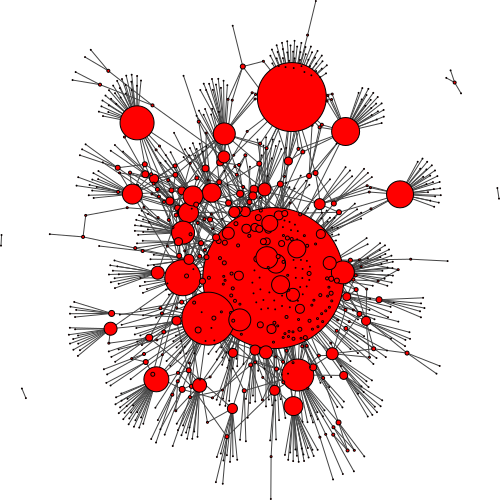

In [69]:
print('the LG graph with node size proportional to degree:')
vs_LG = {"bbox":(500,500), "margin":1}
vs_LG['vertex_size'] = LG.degree()
igraph.plot(LG, **vs_LG)

#### 2. Eigenvectors centrality

The degree of a vertex captures only a **local** measure of importance.
To generalize, we can increase the importance of vertices who are **connected** to other **high-degree** vertices, i.e., *not all neighbors are equal*.
**Eigenvector centralities** assign a vertex an importance score that is proportional to the importance scores of its neighbors -- this is a *recursive* notion of importance.
There are several ways to formalize this, but they can all be calculated as the *principal eigenvector* for a particular eigenvalue problem.
In particular PageRank centrality will be evaluated:

the LG graph with node size proportional to PageRank:


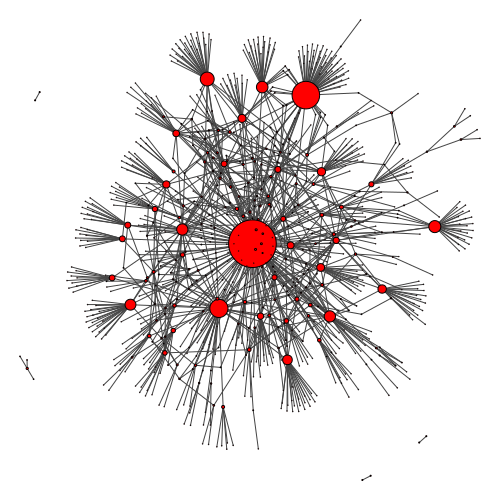

In [70]:
print('the LG graph with node size proportional to PageRank:')
vs_LG = {"bbox":(500,500), "margin":20}
vs_LG['vertex_size'] = [1000*x for x in LG.pagerank()]
igraph.plot(LG, **vs_LG)

#### 3. Betweenness Centrality

### g) Network transitivity level 

The **betweenness** centrality is also derived from geodesic paths, but it relies on the notion that important vertices are the "**bridges**" over which information tends to flow.

In [71]:
import numpy as np
print('a comparison of the top-5 for a few metrics for the ZK graph:')
normalized_degree = [d/LG.ecount() for d in LG.degree()]
bc = LG.betweenness()
hc = LG.harmonic_centrality()
print('normalized degree:')
print(*[(i+1,np.round(normalized_degree[i],3)) for i in np.argsort(normalized_degree)[:-6:-1]])
print('PageRank:')
print(*[(i+1,np.round(pagerank[i],3)) for i in np.argsort(pagerank)[:-6:-1]])
print('harmonic centrality:')
print(*[(i+1,np.round(hc[i],3)) for i in np.argsort(hc)[:-6:-1]])
print('betweenness centrality:')
print(*[(i+1,np.round(bc[i]/LG.vcount()**2,3)) for i in np.argsort(bc)[:-6:-1]])

a comparison of the top-5 for a few metrics for the ZK graph:
normalized degree:
(18, 0.112) (337, 0.055) (21, 0.042) (19, 0.029) (688, 0.027)
PageRank:
(18, 0.048) (337, 0.028) (21, 0.018) (688, 0.014) (395, 0.012)
harmonic centrality:
(18, 0.511) (834, 0.379) (337, 0.378) (290, 0.377) (122, 0.365)
betweenness centrality:
(18, 0.339) (21, 0.08) (337, 0.061) (19, 0.034) (73, 0.031)


the LG graph with node size proportional to degree (left) and betweenness centrality (right):


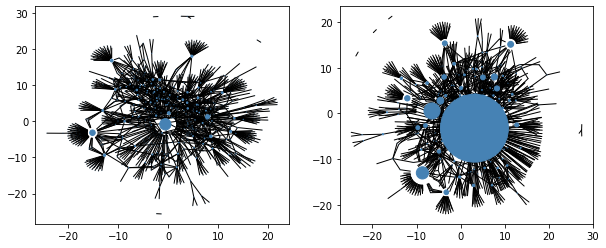

In [72]:
print('the LG graph with node size proportional to degree (left) and betweenness centrality (right):')
fig = plt.figure(figsize=(10,4))
ax = fig.subplots(nrows=1, ncols=2)
vs_LG_d = {"bbox":(400,400), "margin":20}
vs_LG_d['vertex_size'] = [100*x for x in normalized_degree]
igraph.plot(LG, **vs_LG_d, target=ax[0])
vs_LG_bc = {"bbox":(400,400), "margin":20}
vs_LG_bc['vertex_size'] = [200*x/LG.vcount()**2 for x in bc]
igraph.plot(LG, **vs_LG_bc, target=ax[1])

**According to measured centralities the central node seems to be the most important and connected one.**

### h) Community partition 

There are *many* different algorithms for community detection, taking very different approaches:
- **spectral clustering** interprets (some variant of ) the adjacency matrix as a similarity matrix and uses a standard clustering method on its *relevant* eigenvectors 
- **modularity maximization** selected the partition that maximizes the modularity function $Q$
- **random walk** based methods rely in the assumption that a random walker on $G$ will be often *trapped* into a community
- **InfoMap** relies on concepts from information theory to find the partition that allows to optimally compress the information needed to describe the movement of a random walker on $G$

Most techniques implicitly or explicitly search for **assortative** community structure, i.e., they assume that a good partition is a partition where intra-community connections are more frequent than inter-community connections.

A desirable property for a community detection algorithm is its ability to **automatically** choose the number of groups $c$.

Community detection is the network analog of clustering data in a vector space, and, similarly, it **cannot** be solved universally:
- which clustering is optimal depends on what we intend to do with it later
- good community detection methods can be powerful tools for exploratory data analysis or to test specific network hypotheses
- yet, the particular output of any algorithm should not ne interpreted as the *real* modular structure of the network

the LG graph (left) and the equivalent CM graph (right):


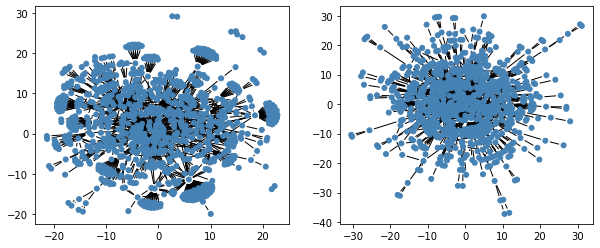

In [73]:
CM = igraph.Graph.Degree_Sequence(LG.degree(), method='vl')

print('the LG graph (left) and the equivalent CM graph (right):')
fig = plt.figure(figsize=(10,4))
ax = fig.subplots(nrows=1, ncols=2)
vs = {"bbox":(300,300), "margin":20}
igraph.plot(LG, **vs, target=ax[0])
igraph.plot(CM, **vs, target=ax[1])

the communities of the LG graph with the Louvain (modularity-based, left) and the walktrap (random-walk-based, right) algorithsm:


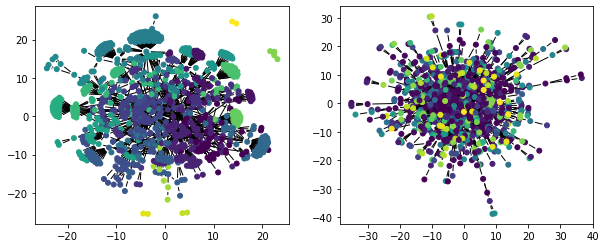

In [74]:
LG_louvain = LG.community_multilevel()
LG_walktrap = LG.community_walktrap().as_clustering()

print('the communities of the LG graph with the Louvain (modularity-based, left) and the walktrap (random-walk-based, right) algorithsm:')
fig = plt.figure(figsize=(10,4))
ax = fig.subplots(nrows=1, ncols=2)
vs = {"bbox":(300,300), "margin":20}
vs['vertex_color']=LG_louvain.membership
igraph.plot(LG, **vs, target=ax[0])
vs['vertex_color']=LG_walktrap.membership
igraph.plot(CM, **vs, target=ax[1])

### i) Assortativity degree

Assortative mixing by degree produces a network in which the high-degree vertices tend to connect to each other in dense, high-degree core, while the low-degree vertices also connect to each other, producing a sparse, low-degree periphery; in these networks, degree correlates with centrality:

In [75]:
print('the degree assortativity of LG is:', LG.assortativity_degree())

the degree assortativity of LG is: -0.17115712577172126


### l) Network randomness

The ER model helps us build intuition about what kinds of patterns we should expect to see in our data, if the true
generating process was "truly random" (i.e., a set of iid coin flips).

As an example, let us compare the EN network with an "equivalent" ER graph.

In [76]:
n,m = LG.vcount(),LG.ecount()
c = 2*m/n
print('LG has', n, 'vertices and average degree', c)
p = c/(n-1)
print('The equivalent ER graph has n =', n, 'and p =', p)
ER_eq = igraph.Graph.Erdos_Renyi(n,p)

LG has 868 vertices and average degree 2.891705069124424
The equivalent ER graph has n = 868 and p = 0.003335299964388032


do these two graph look similar?
the LG graph (left) and the equivalent ER graph (right):


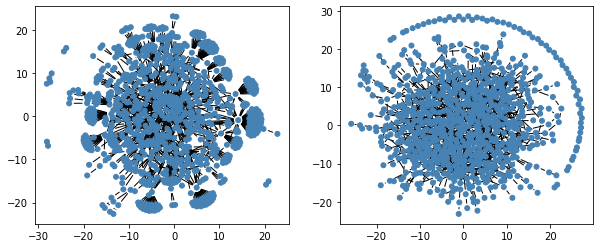

In [77]:
print('do these two graph look similar?')

print('the LG graph (left) and the equivalent ER graph (right):')
fig = plt.figure(figsize=(10,4))
ax = fig.subplots(nrows=1, ncols=2)
vs = {"bbox":(500,500), "margin":20}
igraph.plot(LG, **vs, target=ax[0])
igraph.plot(ER_eq, **vs, target=ax[1])

the CCDF of LG and the equivalent ER graph in log-log scale:


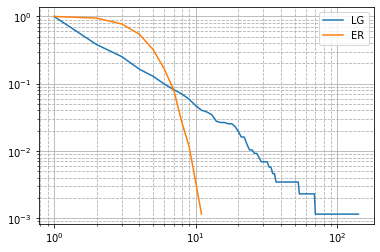

In [78]:
from collections import Counter
LG_deg_count = Counter(LG.degree())
LG_deg_dist_array = np.array([LG_deg_count.get(k,0)/LG.vcount() for k in range(min(LG.degree()),max(EN.degree())+1)])
LG_CCDF = LG_deg_dist_array[::-1].cumsum()[::-1]
degree_range_LG = range(1,len(LG_deg_dist_array)+1)

ER_eq_deg_count = Counter(ER_eq.degree())
ER_eq_deg_dist_array = np.array([ER_eq_deg_count.get(k,0)/ER_eq.vcount() for k in range(min(ER_eq.degree()),max(ER_eq.degree())+1)])
ER_eq_CCDF = ER_eq_deg_dist_array[::-1].cumsum()[::-1]
degree_range_ER_eq = range(1,len(ER_eq_deg_dist_array)+1)

print('the CCDF of LG and the equivalent ER graph in log-log scale:')
plt.loglog(degree_range_LG,LG_CCDF, label='LG')
plt.loglog(degree_range_ER_eq,ER_eq_CCDF, label='ER')
plt.legend()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle='--')